In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/all_lc/'

In [13]:
sectors = [pd.read_csv('TESS-Gaia/gaiatess{0}_xmatch_1arsec-result.csv'.format(n+1)) for n in range(15)]
data = pd.concat(sectors,sort=True)

In [17]:
for col in data.columns:
    print(col)

a_g_percentile_lower
a_g_percentile_upper
a_g_val
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_gof_al
astrometric_matched_observations
astrometric_n_bad_obs_al
astrometric_n_good_obs_al
astrometric_n_obs_ac
astrometric_n_obs_al
astrometric_params_solved
astrometric_primary_flag
astrometric_pseudo_colour
astrometric_pseudo_colour_error
astrometric_sigma5d_max
astrometric_weight_al
b
bp_g
bp_rp
camera
ccd
datalink_url
dec
dec.1
dec_
dec_error
dec_parallax_corr
dec_pmdec_corr
dec_pmra_corr
designation
dist
duplicated_source
e_bp_min_rp_percentile_lower
e_bp_min_rp_percentile_upper
e_bp_min_rp_val
ecl_lat
ecl_lon
epoch_photometry_url
flame_flags
frame_rotator_object_type
g_rp
l
lum_percentile_lower
lum_percentile_upper
lum_val
matched_observations
mean_varpi_factor_al
modality_flag
parallax
parallax_error
parallax_over_error
parallax_pmdec_corr
parallax_pmra_corr
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_mag

In [14]:
tmin, tmax = 5300, 6000

In [35]:
distance = data['r_est']
M_G = data['phot_g_mean_mag'] - 5*np.log10(data['r_est']) + 5

In [38]:
distance.size, M_G.size

(269060, 269060)

Text(0, 0.5, 'Gmag')

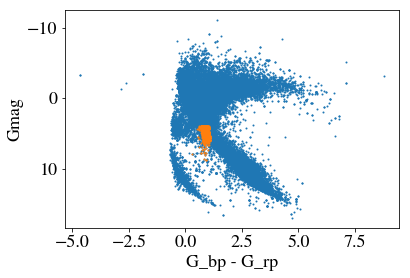

In [51]:
mask = (M_G > 4) & (M_G < 10) & (data['teff_val'] > tmin) & (data['teff_val'] < tmax)
plt.scatter(data['phot_bp_mean_mag'] - data['phot_rp_mean_mag'], M_G, s=1)
plt.scatter(data['phot_bp_mean_mag'][mask] - data['phot_rp_mean_mag'][mask], M_G[mask], s=1)
plt.gca().invert_yaxis()
plt.xlabel('G_bp - G_rp')
plt.ylabel('Gmag')

In [52]:
data[mask]

,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,...,tess_sector3_oid,tess_sector4_oid,tess_sector5_oid,tess_sector6_oid,tess_sector7_oid,tess_sector8_oid,tess_sector9_oid,ticid,tmag,visibility_periods_used
16,0.0160,0.2803,0.0857,387.74338,0.000000,0.000000e+00,6.233439,27,3,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317350640,9.71,17
19,0.2289,0.5806,0.3160,365.52255,0.000000,0.000000e+00,6.182300,25,2,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323423533,8.66,17
27,0.0986,0.2810,0.1730,494.93542,0.000000,0.000000e+00,11.152177,22,4,192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394680654,9.79,15
39,0.0555,0.4820,0.2655,699.01416,0.000000,1.075677e+00,14.423836,28,9,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302967382,9.14,18
47,0.0644,0.2124,0.1447,1056.52040,0.128244,7.715698e+00,21.401638,28,6,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370328257,8.92,17
48,0.0164,0.2270,0.0960,15245.20900,1.090255,4.153175e+02,96.669365,23,14,188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269764590,10.26,16
50,0.0170,0.2690,0.1153,429.18330,0.000000,0.000000e+00,8.685881,24,6,206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394702423,9.53,17
52,0.0086,0.3378,0.1570,489.38162,0.000000,1.952011e-15,10.211791,25,7,211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388197833,8.96,16
54,0.0080,0.0791,0.0340,317.96835,0.000000,0.000000e+00,7.037799,19,4,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394700124,9.16,15
63,0.0020,0.1604,0.0910,267.37305,0.000000,0.000000e+00,4.894342,21,4,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274017898,9.09,13


In [53]:
data.to_csv('ticGAIA1to13solar.csv')

In [58]:
data['ticid']

0        267166222
1        279798170
2        394819350
3        394819349
4        410338174
5        323433390
6        261089835
7        410390905
8        410388831
9        260951838
10       269857504
11       376986714
12       392011573
13       269857351
14       260949316
15       317350663
16       317350640
17       435869021
18       410355112
19       323423533
20       317350271
21       358502706
22       267193828
23       435869116
24       293481325
25       410354965
26       410354930
27       394680654
28       350155206
29       350155155
           ...    
18914    288523776
18915    288514307
18916    288510158
18917    288508510
18918    288471156
18919    288471108
18920    288432276
18921    288469460
18922    288432312
18923    288510228
18924    288508526
18925    288525670
18926    288523885
18927    288516176
18928    288599646
18929    288524055
18930    288601649
18931    288516301
18932    288516339
18933    288510440
18934    288471431
18935    288